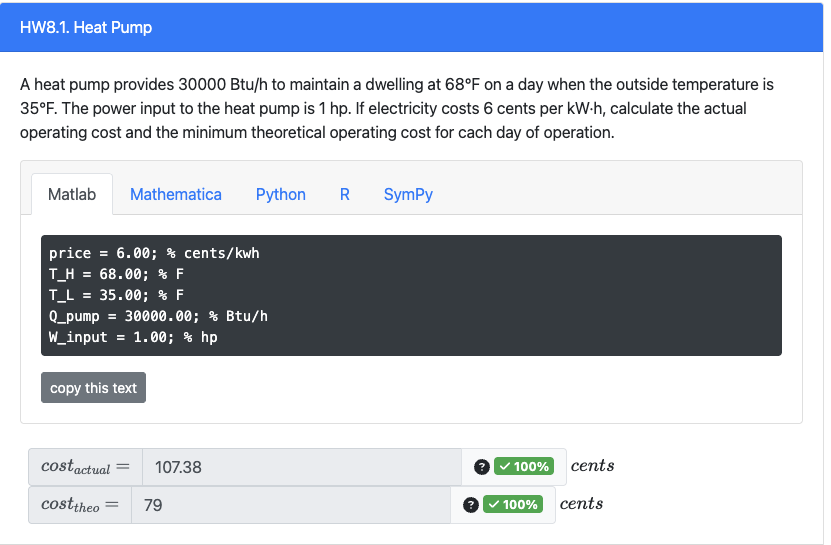

In [8]:
# 1
# cop_max=Th/(Th-Tl)
# 最小功率需求 Win=Qpump/cop_max

# cost_act=Winput花费
# cost_theo=Wmin花费

from sympy import *

price =6.00 # cents/kwh
T_H = 68.00 # F
T_L = 35.00 # F
Q_pump = 30000.00 # Btu/h
W_input = 1.00 # hp

###################
T_H = (T_H + 459.67) * 5 / 9  # 转换为开尔文
T_L = (T_L + 459.67) * 5 / 9
Q_pump = Q_pump * 0.2931 / 1000  # 转换为kW
W_input = W_input*0.7457  # 1 hp转换为kW


# 实际运行成本
cost_actual = price * W_input * 24
print(f"实际运行成本 cost_actual = {cost_actual:.2f} cents")

# 最小理论运行成本
COP_max = T_H / (T_H - T_L)
W_min = Q_pump / COP_max
cost_theo = price * W_min * 24
print(f"最小理论运行成本 cost_theo = {cost_theo:.0f} cents")

实际运行成本 cost_actual = 107.38 cents
最小理论运行成本 cost_theo = 79 cents


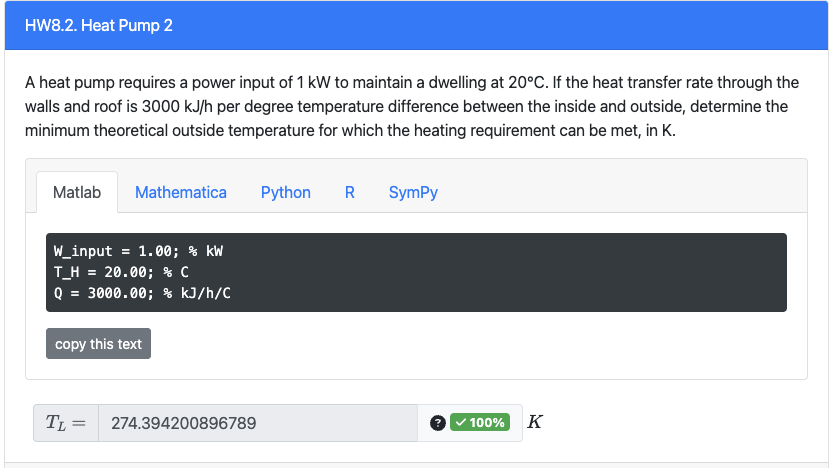

In [ ]:
# 2

# Winput=1000 #J/s 传入速率
# Q传热速率 转化为J/s/K

# 卡诺性能 cop_max=Th/(Th-Tl)=QH/W
# QH=Q*(Th-Tl) 这个都是速率

from sympy import *

W_input = 1.00 # kW
T_H = 20.00 # C
Q = 3000.00 # kJ/h/C
##############

Winput=W_input*1e3
Q=Q/3600*1000
Th=T_H+273.15

Tl=S("Tl")

Qh=Q*(Th-Tl)
cop1=Th/(Th-Tl)
cop2=Qh/Winput

an=solve([cop1-cop2],[Tl])
print(min(an[0],an[1]))

293.15/(293.15 - Tl) 244.291666666667 - 0.833333333333333*Tl
(274.394200896789,)


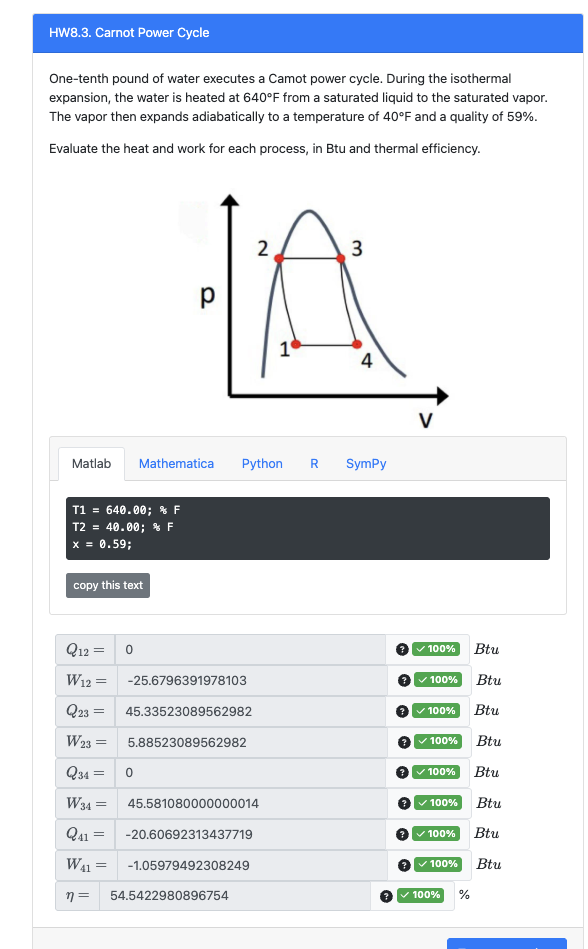




  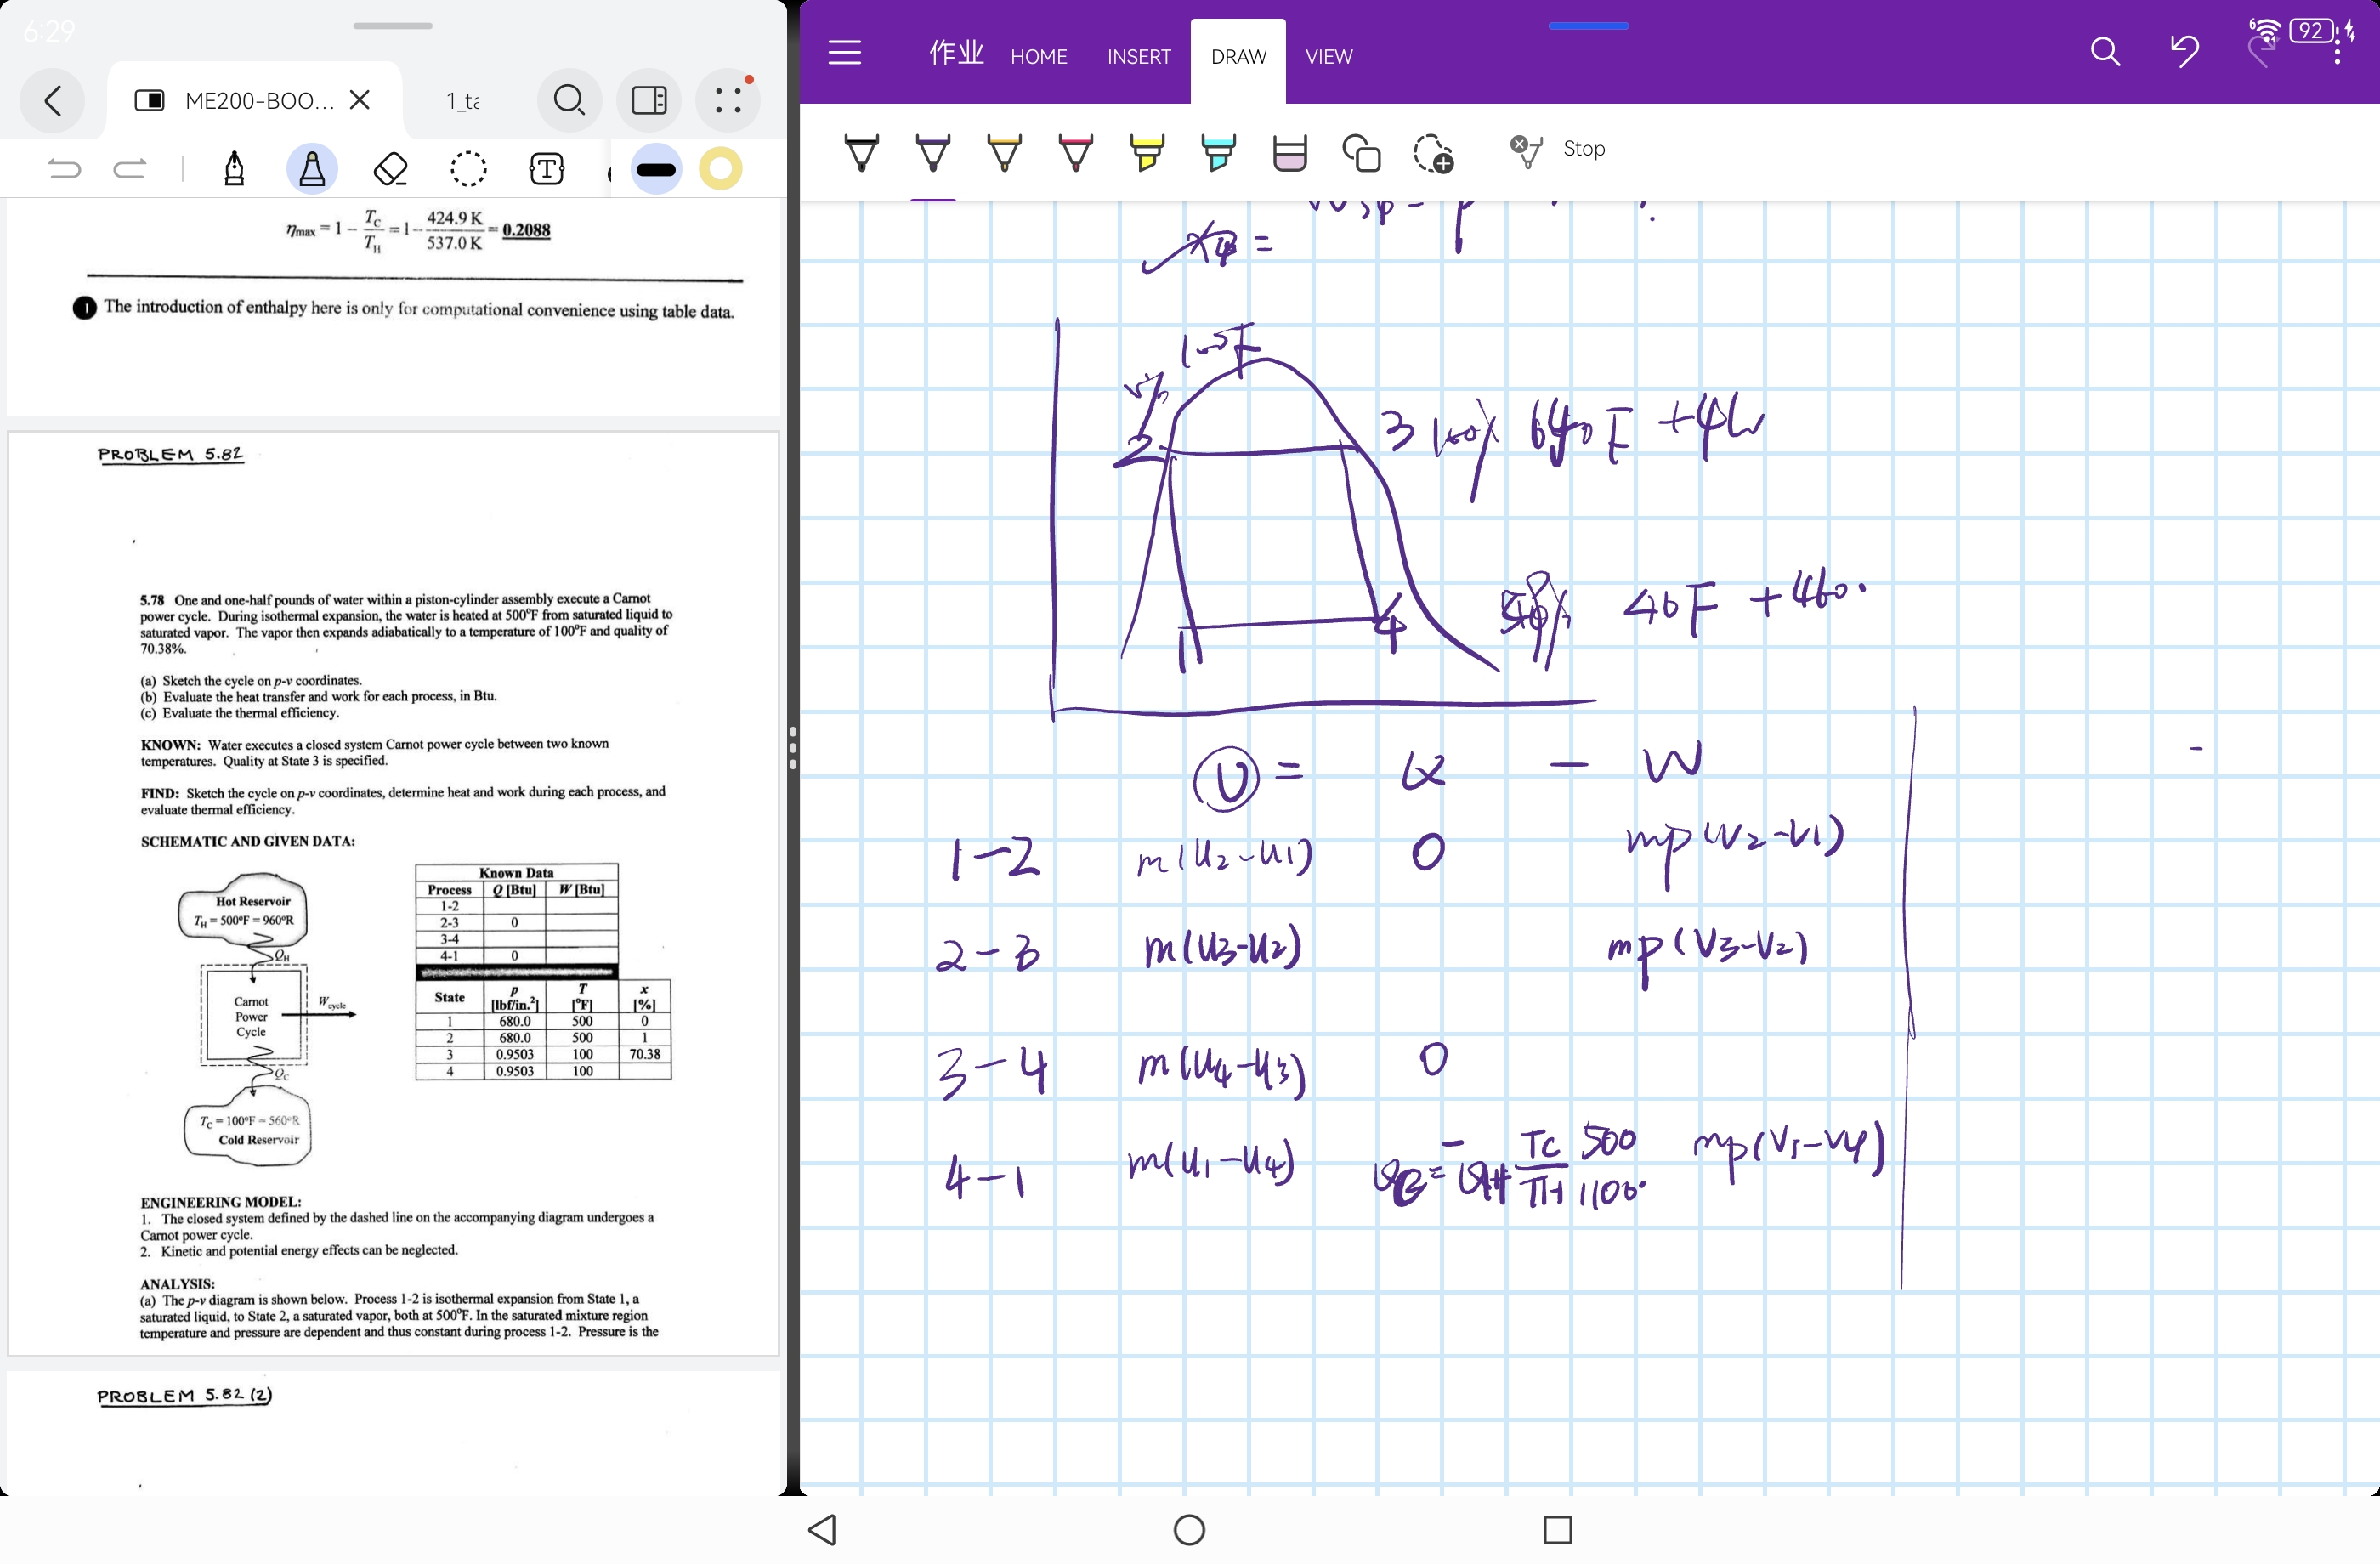

In [ ]:
# 3
# 单位如下
# 质量lb 体积ft3 力 lbf 
# 1 in= 1/12 ft
# 1 btu= 778 ft *lbf

from sympy import *

T1 = 640.00
T2 = 40.00
x = 0.59

####################
m=0.1# lb

# 单位换算
rate=144/778

p1=2057.1 # lbf/in2
p2=0.1217


# 2
u2=668.7 # btu/lb
u3=1063.2 # btu/lb

v2=0.02593 # ft3/lb
v3=0.1805 # ft3/lb

x = 0.59
u4=x*(1023.9)+(1-x)*8.02


v4=x*(2445)+(1-x)*0.01602


h4=x*(1078.9)+(1-x)*8.02
u4=x*(1023.9)+(1-x)*8.02

# print(h4)
# print(W12)
# 只有w这个需要乘rate

W23=m*p1*(v3-v2)*rate
Q23=W23+m*(u3-u2)


Tc=T2+460
Th=T1+460
Q41=-Q23*(Tc/Th)



# m**(h1-h4)=Q41
h1=Q41/m+h4


# print('h4',h4)
# print('h1',h1)
x1=S('x1')
x1=solve(h1-(x1*1078.9+(1-x1)*8.02),x1)[0]
# print(x1)

v1=x1*(2445)+(1-x1)*0.01602
u1=x1*(1023.9)+(1-x1)*8.02

W41=m*p2*(v1-v4)*rate

Q12=0
W12=-m*(u2-u1)
Q34=0
W34=-m*(u4-u3)

print('Q12',Q12)
print("W12",W12)
print('Q23',Q23)
print('W23',W23)
print('Q34',Q34)
print('W34',W34)
print('Q41',Q41)
print('W41',W41)


eta=(W23+W12+W34+W41)/(Q23)

print(eta*100)


Q12 0
W12 -25.6796391978103
Q23 45.33523089562982
W23 5.885230895629819
Q34 0
W34 45.581080000000014
Q41 -20.60692313437719
W41 -1.05979492308249
54.5422980896754


In [ ]:
document.querySelector('input[name="Q12"]').value = '0';
document.querySelector('input[name="W12"]').value = '-25.6796391978103';
document.querySelector('input[name="Q23"]').value = '45.33523089562982';
document.querySelector('input[name="W23"]').value = '5.88523089562982';
document.querySelector('input[name="Q34"]').value = '0';
document.querySelector('input[name="W34"]').value = '45.581080000000014';
document.querySelector('input[name="Q41"]').value = '-20.60692313437719';
document.querySelector('input[name="W41"]').value = '-1.05979492308249';
document.querySelector('input[name="eta"]').value = '54.5422980896754';


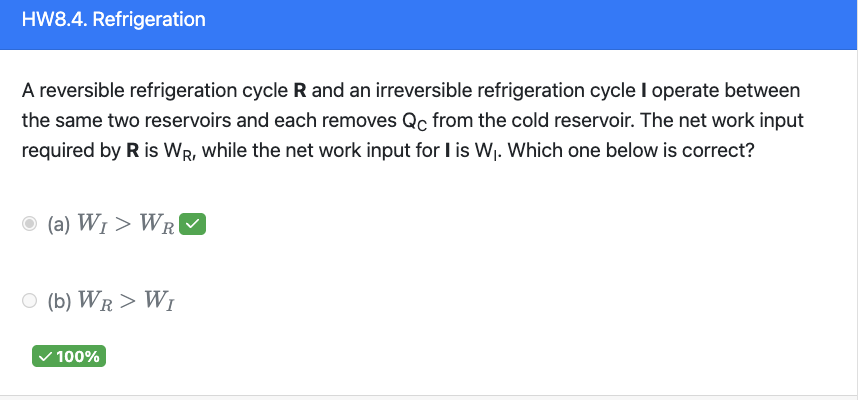

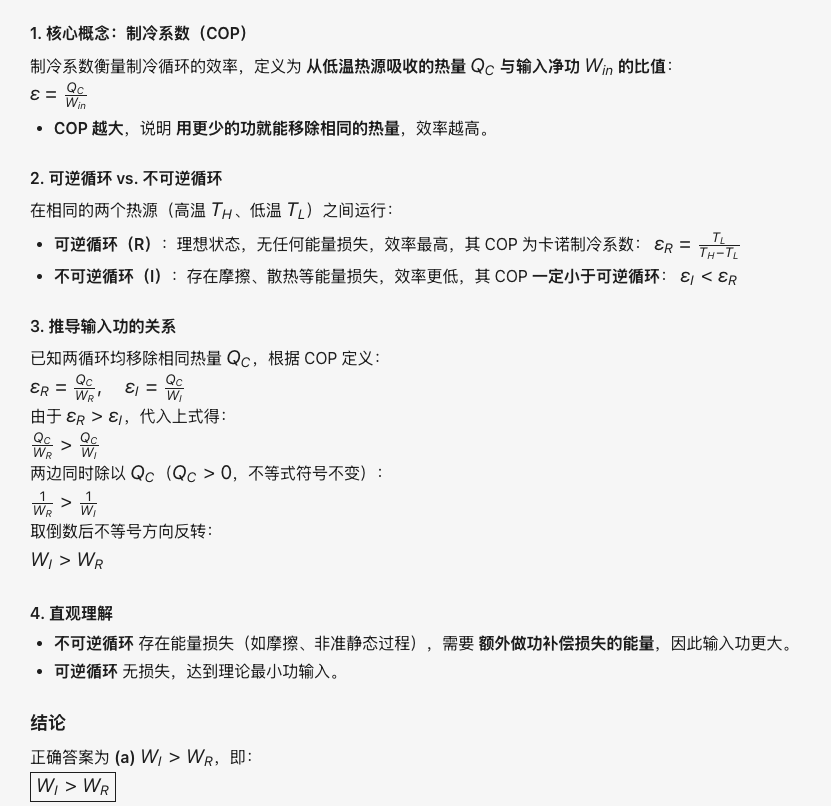

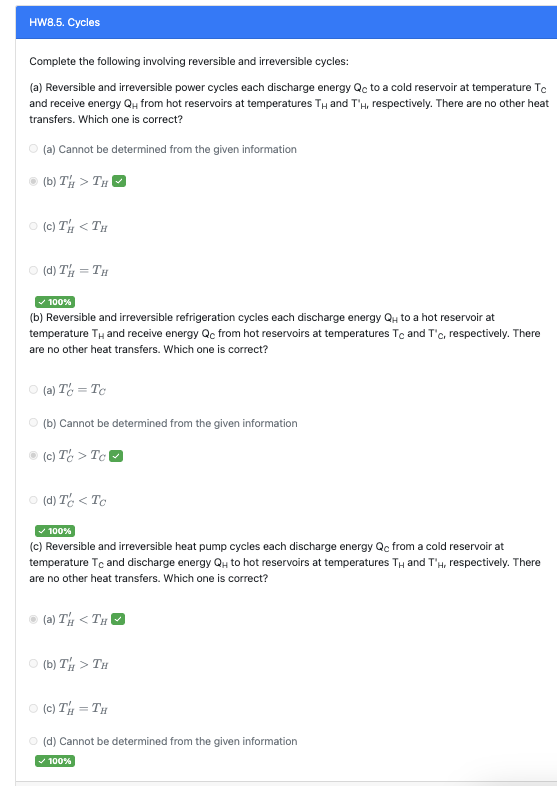

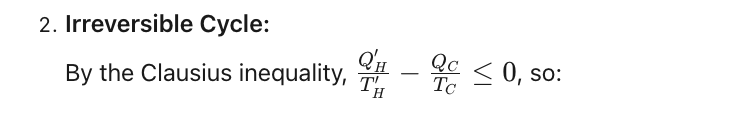

# 这道题纯靠克劳修斯

In [ ]:
# 6
# 注意1Mpa=10bar
u_c = 2101.70 # kJ/kg
###################################


s1=(6.7690+6.5408)/2
print(s1)

# 压缩液体的S可以近似为饱和液体在相同温度下的S 基本就是99。63这个
s2=1.3026
print(s2)

s3=(u_c-1147.8)/(2597.1-1147.8)*(5.734-2.9202)+2.9202
print(s3)


6.6549
1.3026
4.772186352032016


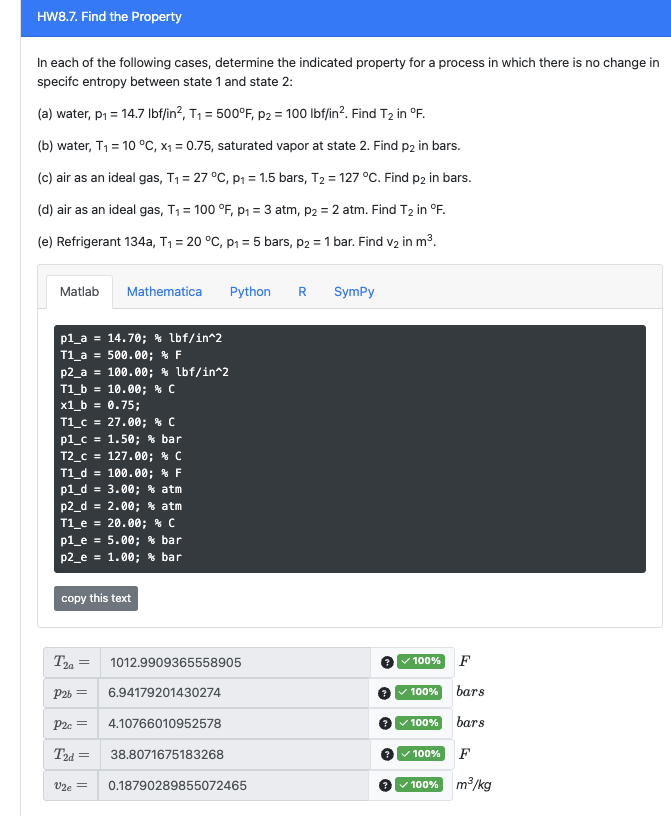

In [ ]:
# 7
# 其实就是疯狂查表
from sympy import *

p1_a = 14.70 # lbf/in^2
T1_a = 500.00 # F
p2_a = 100.00 # lbf/in^2
T1_b = 10.00 # C
x1_b = 0.75
T1_c = 27.00 # C
p1_c = 1.50 # bar
T2_c = 127.00 # C
T1_d = 100.00 # F
p1_d = 3.00 # atm
p2_d = 2.00 # atm
T1_e = 20.00 # C
p1_e = 5.00 # bar
p2_e = 1.00 # bar





# 1

s=1.9263

print(1100+100*(s-1.9551)/(1.9882-1.9551))





# 2
s=x1_b*8.9008+(1-x1_b)*0.1510
# print(s)
p=(6.7502-s)/(6.7502-6.6663)*(7.917-6.178)+6.178
print('p',p)







# 3
cp=1005 # J/kg/K
R=287 # J/kg/K
T1=300
T2=400
p1=1.5 # bar
# dertaS=(cp*ln(T2/T1)-R*ln(P1/P2))/(T2-T1)
p2=S("p2")
q1=cp*ln(T2/T1)-R*ln(p2/p1)
p2=solve([q1],[p2])[0][0]
print('p2',p2)



# 4
T1=100
T1=5/9*(T1+459.67)
p1=3
p2=2
T2=S('T2')

q1=cp*ln(T2/T1)-R*ln(p2/p1)
T2=solve([q1],[T2])[0][0]
T2=T2*9/5-459.67
print('T2',T2)




# 5 

s1=0.9264
v2e=0.19170-(0.9395-s1)/(0.9602-0.9395)*(0.006)

print('v2e',v2e)





1012.9909365558905
p 6.94179201430274
p2 4.10766010952578
T2 38.8071675183268
v2e 0.18790289855072465
